[**REFERENCE**](https://medium.com/aubergine-solutions/scratching-surface-of-rnn-gru-and-lstm-with-example-of-sentiment-analysis-8dd4e748d426)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset IMDB/IMDB Dataset.csv")

train_set = 45000
max_len_text = 2000

df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', 0)

In [4]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
vector = tokenizer.texts_to_sequences(df['review'])

In [5]:
type(vector[0])

list

In [6]:
train_data = np.array(vector,dtype=list)[:train_set]
train_label = (np.array(df['sentiment'])[:train_set])
test_data = np.array(vector,dtype=list)[train_set:]
test_label = (np.array(df['sentiment'])[train_set:])

In [7]:
padded_train = pad_sequences(train_data, maxlen=max_len_text)
padded_test = pad_sequences(test_data, maxlen=max_len_text)

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(13000, 16, input_length=max_len_text))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 16)          208000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 249,601
Trainable params: 249,601
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(padded_train, train_label, epochs=4, validation_data=(padded_test, test_label))

Epoch 1/4
1407/1407 [==============================] - 174s 117ms/step - loss: 0.4209 - accuracy: 0.8061 - val_loss: 0.2942 - val_accuracy: 0.8786
Epoch 2/4
1407/1407 [==============================] - 164s 116ms/step - loss: 0.2588 - accuracy: 0.9007 - val_loss: 1.6444 - val_accuracy: 0.5288
Epoch 3/4
1407/1407 [==============================] - 163s 116ms/step - loss: 0.2303 - accuracy: 0.9115 - val_loss: 0.2727 - val_accuracy: 0.8948
Epoch 4/4
1407/1407 [==============================] - 164s 117ms/step - loss: 0.1897 - accuracy: 0.9287 - val_loss: 0.2755 - val_accuracy: 0.8948


In [11]:
def plotLearningCurve(history,epochs):
    import matplotlib.pyplot as plt

    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history['accuracy'])
    plt.plot(epoch_range,history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Val'])
    plt.show()

    plt.plot(epoch_range,history['loss'])
    plt.plot(epoch_range,history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()

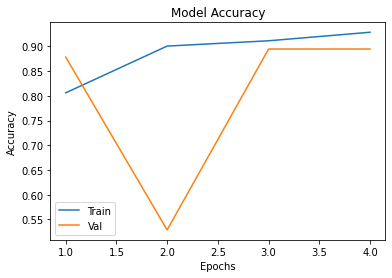

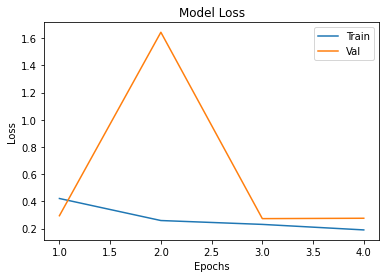

In [12]:
plotLearningCurve(history.history,len(history.epoch))